#### Load in required packages

In [4]:
library(dplyr)
library(ggplot2)
library(tidyr)
library(gridExtra)
library(cowplot)

Warning message:
"package 'dplyr' was built under R version 3.3.3"
Attaching package: 'dplyr'

The following object is masked _by_ '.GlobalEnv':

    count

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'tidyr' was built under R version 3.3.3"Warning message:
"package 'gridExtra' was built under R version 3.3.3"
Attaching package: 'gridExtra'

The following object is masked from 'package:dplyr':

    combine


Attaching package: 'cowplot'

The following object is masked from 'package:ggplot2':

    ggsave



#### Set parameters

In [52]:
no_runs<-5
FLmean<-100
no_neutral<-10
pop_size<-400
no_FL<-5
df.tocall<-"Avg.neutral (1).csv"
paras<-c(54, 56, 58, 55, 57, 59)
ylb<-"Average variance at neutral loci"
xlb<-"Generation (0-500)"
xlm<-c(0,500)
ylm<-c(-0.01,0.25)
trait<-"IBDxIBT" #for title of plot

#### Make generation dataframe

In [5]:
plot.df<-as.data.frame(matrix(nrow=11, ncol=1))
names(plot.df)<-"gen"
plot.df[1:11,1]<-c(1, seq(from=50, to=500, by=50))

#### Call in and arrange linkage dataframes

In [43]:
rm(df.1, df.2, df.3, df.4, df.5, df.6)

In [44]:
for (e in paras) {

  #set working directory
  start_wd<-(paste("C:/Users/Madeline/Desktop/Weis lab/EEB498/Updated_sets", paste("para_set", e, sep="_"), sep="/"))
  setwd(start_wd)
    
  #ensure all dataframes are loaded into the environment
  df.sig<-paste("df", paste(match(e, paras)), sep=".")
  assign(df.sig, read.csv(df.tocall, header = TRUE))
  
  rm(df.sig)
  
} #next e

#### Arrange independent dataframes into single dataframe

In [45]:
LD.D<-bind_cols(as.data.frame((lapply(ls(pattern = "df.*"), get))))  %>%  
    select(1:length(paras))  %>% 
    bind_cols(plot.df)

names(LD.D)[1:length(paras)]<-c(paste("P",c(1:length(paras)),sep=""))

#### Generate ggplot

In [55]:
LD.D.plot1<-ggplot(data=LD.D, aes(x=gen))+
  geom_line(aes(y=P1), colour="darkgreen", size=2)+
  geom_line(aes(y=P2), colour="yellow", size=2)+
  geom_line(aes(y=P3), colour="darkblue", size=2)+
  theme(legend.position="top")+
  scale_fill_discrete(name = "Density",  labels = paras) +
  labs(x=xlb, y=ylb)+
  xlim(xlm)+ylim(ylm)+theme_classic()+
  theme(axis.ticks = element_blank(), axis.text = element_text(size=12,face="bold"),
        axis.title.x = element_text(size = 15),
        axis.title.y = element_text(size = 15),
        plot.title = element_text(hjust=0.5,face="bold", size=20))

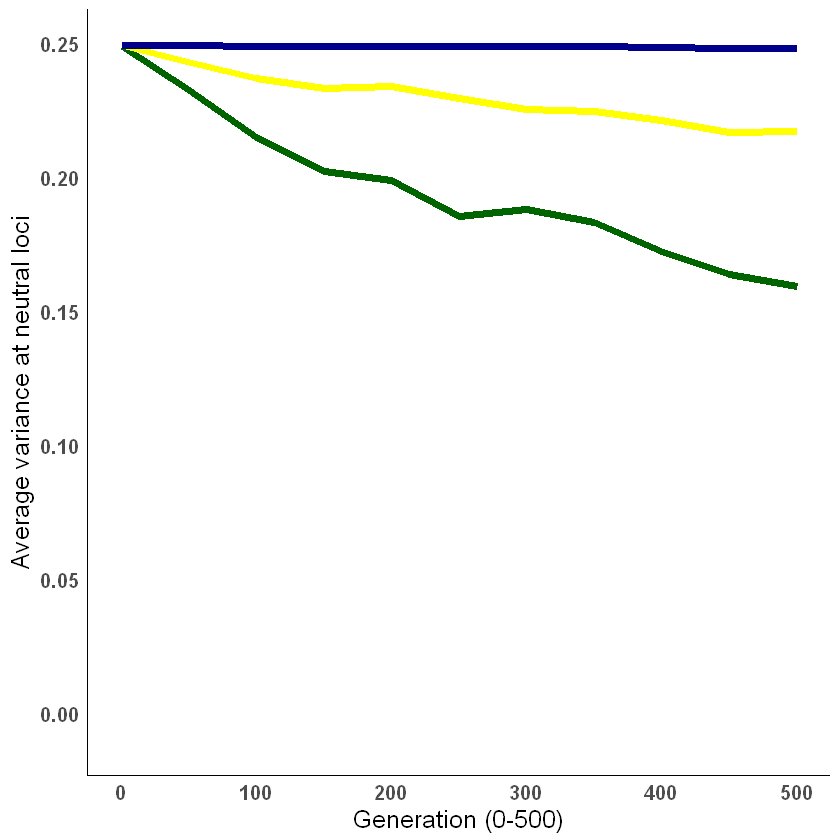

In [56]:
plot(LD.D.plot1)

In [57]:
LD.D.plot2<-ggplot(data=LD.D, aes(x=gen))+
  geom_line(aes(y=P4), colour="darkgreen", size=2)+
  geom_line(aes(y=P5), colour="yellow", size=2)+
  geom_line(aes(y=P6), colour="darkblue", size=2)+
  theme(legend.position="top")+
  scale_fill_discrete(name = "Density",  labels = paras) +
  labs(x=xlb, y=ylb)+
  xlim(xlm)+ylim(ylm)+theme_classic()+
  theme(axis.ticks = element_blank(), axis.text = element_text(size=12,face="bold"),
        axis.title.x = element_text(size = 15),
        axis.title.y = element_text(size = 15),
        plot.title = element_text(hjust=0.5,face="bold", size=20))

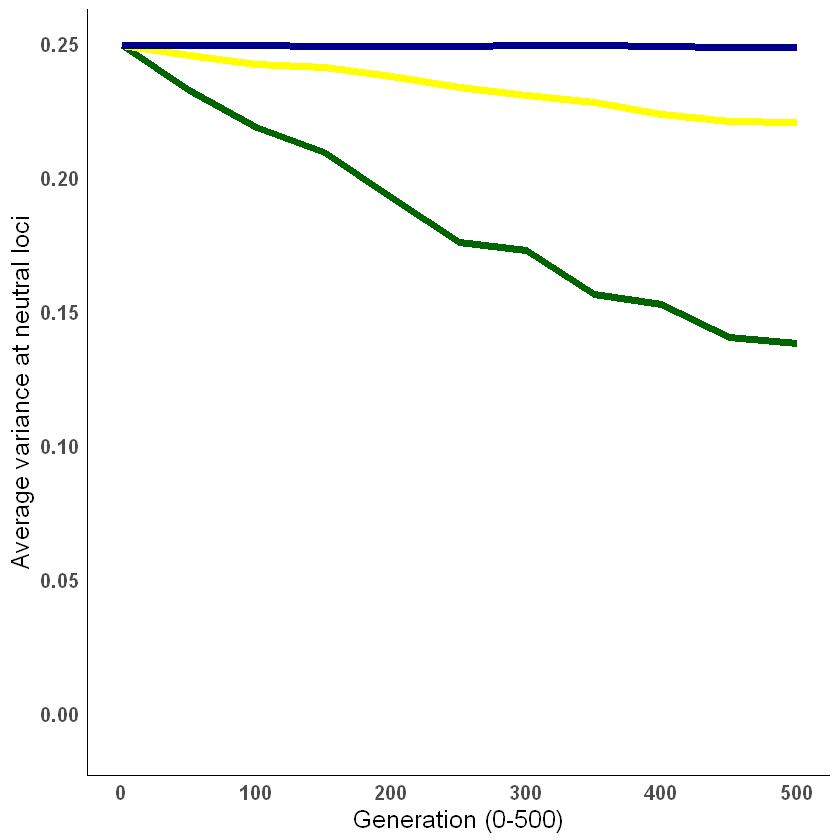

In [58]:
plot(LD.D.plot2)

In [59]:
head(LD.D)

P1,P2,P3,P4,P5,P6,gen
0.2491489,0.2494682,0.2495264,0.2493158,0.2493061,0.2495388,1
0.2325941,0.2432334,0.2492543,0.2325380,0.2456288,0.2494632,50
0.2151724,0.2369438,0.2491080,0.2189906,0.2424754,0.2493949,100
0.2025205,0.2334839,0.2490593,0.2093988,0.2413738,0.2492210,150
0.1990861,0.2342832,0.2490844,0.1926572,0.2379988,0.2491973,200
0.1854282,0.2295462,0.2490430,0.1759140,0.2337029,0.2491376,250


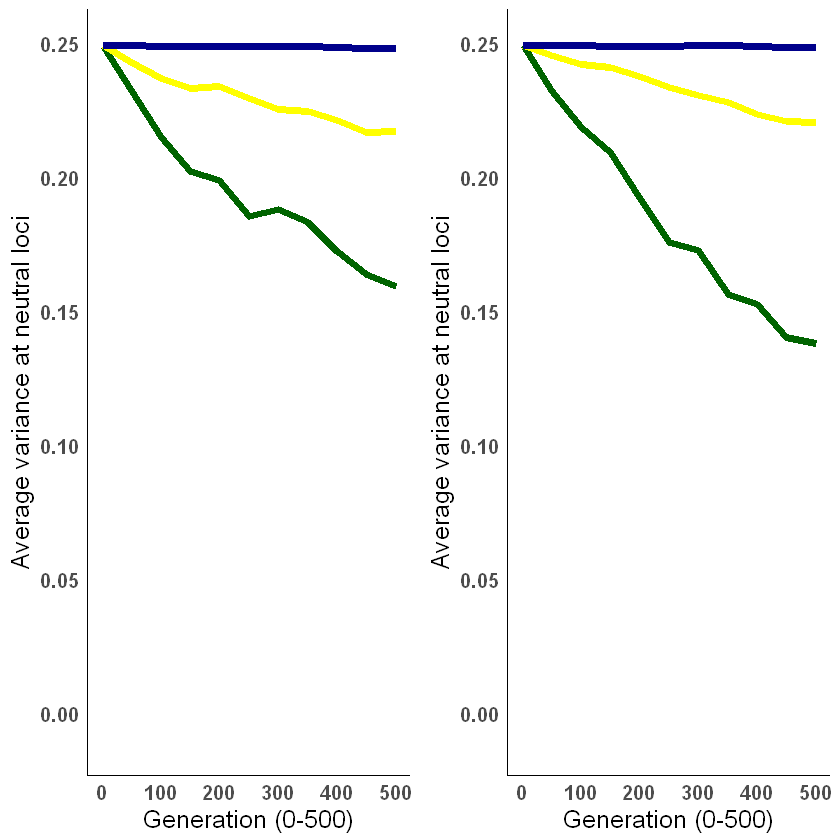

In [60]:
comb.plot<-arrangeGrob(grid.arrange(LD.D.plot1,LD.D.plot2, nrow=1, ncol=2, widths=c(2,2)))

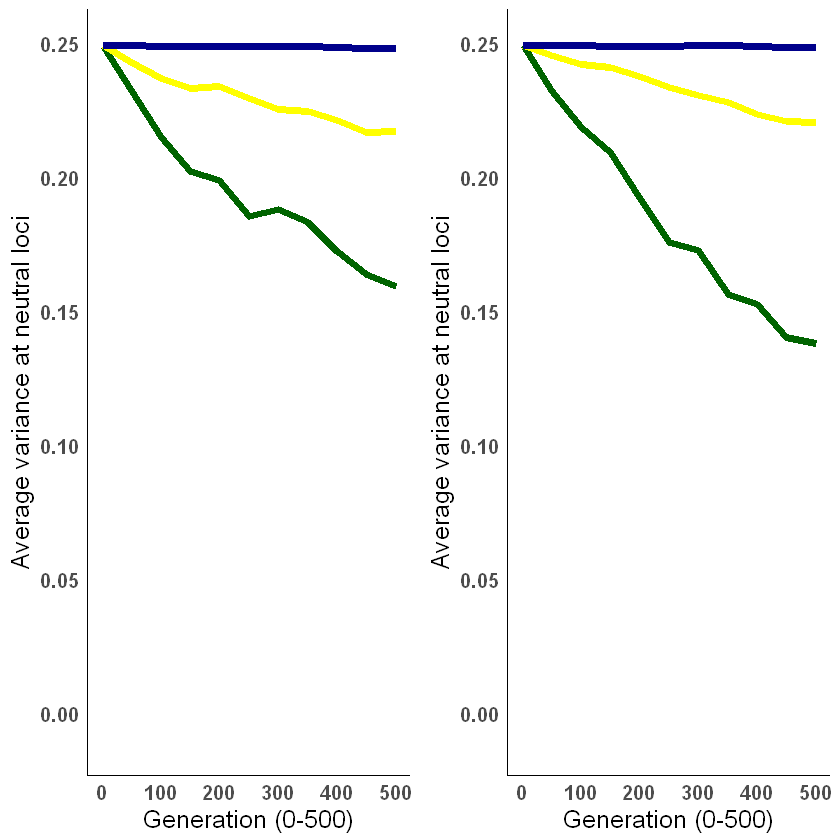

In [61]:
plot(comb.plot)

In [62]:
ggsave("N var.jpeg", plot=comb.plot, path="C:/Users/Madeline/Desktop/Weis lab/EEB498/Figures", width=12, height=5)